# New Section

In [ ]:
lables = pd.read_csv("/home/up2121537/kaggle/steel_detection/traincsv/train.csv")

In [ ]:
lables

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

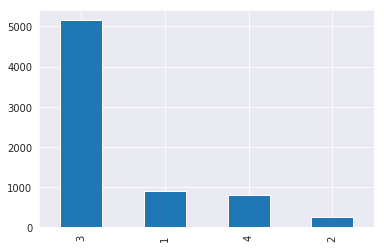

In [ ]:
lables["ClassId"].value_counts().plot(kind = 'bar')
lables["ClassId"].value_counts()

In [ ]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

lables = pd.read_csv("/home/up2121537/kaggle/steel_detection/traincsv/train.csv")

train_dir = '/home/up2121537/kaggle/steel_detection/train'
Class = '/home/up2121537/kaggle/steel_detection/Class'

if not os.path.exists(Class):
    os.mkdir(Class)

for row in lables.itertuples():
    ImageId = row.ImageId
    ClassId = row.ClassId

    if not os.path.exists(Class + str(ClassId)):
        os.mkdir(Class + str(ClassId))

    src_path = train_dir + '/' + ImageId
    dst_path = Class + str(ClassId) + '/' + ImageId

    try:
        shutil.copy2(src_path, dst_path)
        print("successful")
    except IOError as e:
        print ('Unable to copy file {} to {}'
               .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

In [ ]:

import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import matplotlib.pyplot as plt


Found 5677 images belonging to 4 classes.
Found 1418 images belonging to 4 classes.
Epoch 1/10
177/177 [==============================] - 77s 431ms/step - loss: 0.8715 - acc: 0.7219 - val_loss: 0.8304 - val_acc: 0.7251
Epoch 2/10
177/177 [==============================] - 77s 434ms/step - loss: 0.7817 - acc: 0.7252 - val_loss: 0.7544 - val_acc: 0.7251
Epoch 3/10
177/177 [==============================] - 78s 439ms/step - loss: 0.7469 - acc: 0.7247 - val_loss: 0.7286 - val_acc: 0.7259
Epoch 4/10
177/177 [==============================] - 78s 441ms/step - loss: 0.7287 - acc: 0.7261 - val_loss: 0.7106 - val_acc: 0.7266
Epoch 5/10
177/177 [==============================] - 77s 436ms/step - loss: 0.7036 - acc: 0.7283 - val_loss: 0.6912 - val_acc: 0.7251
Epoch 6/10
177/177 [==============================] - 77s 436ms/step - loss: 0.6907 - acc: 0.7297 - val_loss: 0.6754 - val_acc: 0.7386
Epoch 7/10
177/177 [==============================] - 78s 438ms/step - loss: 0.6771 - acc: 0.7320 - val_lo

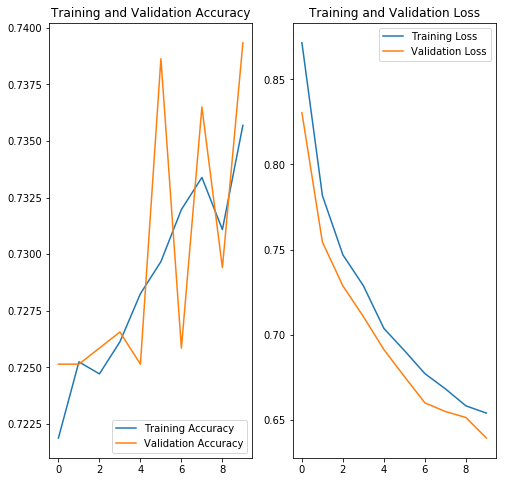

Found 7095 images belonging to 4 classes.


/home/up2121537/.local/lib/python3.6/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Acc: 0.7478789687156677


In [ ]:
# model 2 just 3 CNN layers , the size of kernel is (3,3) with 10 epoches and using data augmentation
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define the data directories
data_dir = '/home/up2121537/kaggle/steel_detection/data/Class'

# Flow the data from the directories and apply data augmentation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    epochs=10,
    verbose=1
)

# Plot the training and validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the testing data
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical'
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples//test_generator.batch_size)

print('Test Acc:', test_acc)



Found 5677 images belonging to 4 classes.
Found 1418 images belonging to 4 classes.
Epoch 1/50
177/177 [==============================] - 77s 433ms/step - loss: 0.8710 - acc: 0.7231 - val_loss: 0.8115 - val_acc: 0.7259
Epoch 2/50
177/177 [==============================] - 77s 438ms/step - loss: 0.8218 - acc: 0.7261 - val_loss: 0.8154 - val_acc: 0.7251
Epoch 3/50
177/177 [==============================] - 79s 445ms/step - loss: 0.8096 - acc: 0.7252 - val_loss: 0.8218 - val_acc: 0.7259
Epoch 4/50
177/177 [==============================] - 79s 445ms/step - loss: 0.8047 - acc: 0.7251 - val_loss: 0.7911 - val_acc: 0.7280
Epoch 5/50
177/177 [==============================] - 74s 419ms/step - loss: 0.7891 - acc: 0.7258 - val_loss: 0.8130 - val_acc: 0.7287
Epoch 6/50
177/177 [==============================] - 79s 447ms/step - loss: 0.7750 - acc: 0.7247 - val_loss: 0.7475 - val_acc: 0.7259
Epoch 7/50
177/177 [==============================] - 78s 442ms/step - loss: 0.7506 - acc: 0.7229 - val_lo

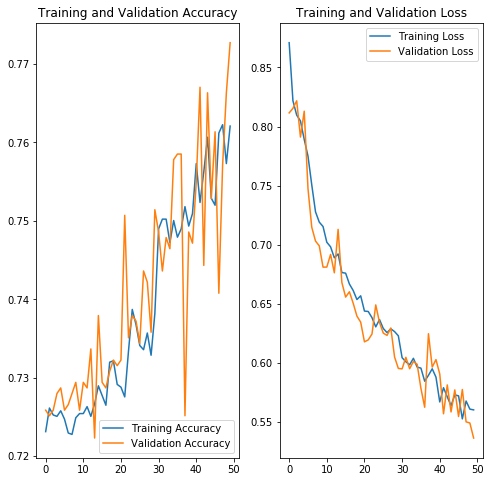

Found 7095 images belonging to 4 classes.
Test Acc: 0.78125


In [ ]:
# the most accurate model with 3 Conv layers with maxpooling and Dropout , the size of kernel is (5,5) with 50 epoches and using data augmentation
# model 3
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), strides=(2, 2) ,activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Conv2D(32, (4,4), strides=(2, 2) ,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Conv2D(64, (4,4), strides=(2, 2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define the data directories
data_dir = '/home/up2121537/kaggle/steel_detection/data/Class'


# Flow the data from the directories and apply data augmentation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    epochs=50,
    verbose=1
)

# Plot the training and validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the testing data
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical'
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples//test_generator.batch_size)

print('Test Acc:', test_acc)


Found 5677 images belonging to 4 classes.
Found 1418 images belonging to 4 classes.
Epoch 1/10
177/177 [==============================] - 104s 566ms/step - loss: 0.9244 - acc: 0.7183 - val_loss: 0.8999 - val_acc: 0.7273
Epoch 2/10
177/177 [==============================] - 98s 554ms/step - loss: 0.8741 - acc: 0.7254 - val_loss: 0.8669 - val_acc: 0.7259
Epoch 3/10
177/177 [==============================] - 99s 558ms/step - loss: 0.8641 - acc: 0.7261 - val_loss: 0.8511 - val_acc: 0.7273
Epoch 4/10
177/177 [==============================] - 98s 554ms/step - loss: 0.8641 - acc: 0.7265 - val_loss: 0.8464 - val_acc: 0.7273
Epoch 5/10
177/177 [==============================] - 98s 554ms/step - loss: 0.8625 - acc: 0.7260 - val_loss: 0.8520 - val_acc: 0.7266
Epoch 6/10
177/177 [==============================] - 98s 552ms/step - loss: 0.8615 - acc: 0.7251 - val_loss: 0.8493 - val_acc: 0.7273
Epoch 7/10
177/177 [==============================] - 98s 555ms/step - loss: 0.8570 - acc: 0.7261 - val_l

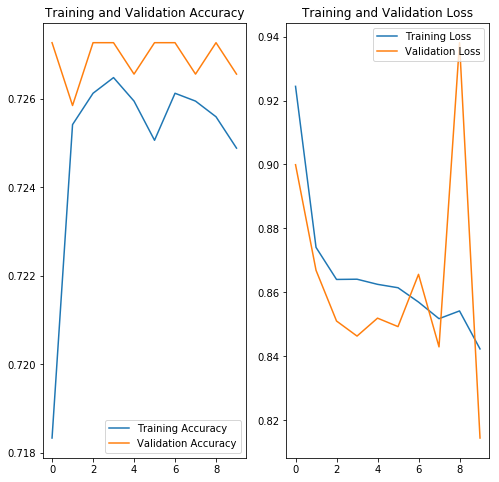

Found 7095 images belonging to 4 classes.
222/222 [==============================] - 98s 440ms/step - loss: 0.8201 - acc: 0.7259
Test accuracy: 0.7258632779121399


In [ ]:
# Model 1= using pretrained model ResNet50
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define the model architecture
base_model = ResNet50(input_shape=(120, 120, 3), include_top=False, weights='imagenet')
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Define the data directories
data_dir = '/home/up2121537/kaggle/steel_detection/data/Class'

# Flow the data from the directories and apply data augmentation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    epochs=10,
    verbose=1
)

# Plot the training and validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the testing data
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print('Test accuracy:', test_acc)
